## Auto Regressive for Featuer Extraction by Lags of time series
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
eeg_data = pd.read_csv('Subject_1_VR.csv')
eeg_data.head()

,CH 1,CH 2,CH 3,CH 4,CH 6,CH 7,CH 8
0,1.918465e-12,1.520561e-12,1.714184e-13,-3.422151e-12,-6.483702e-14,1.247003e-12,1.392664e-12
1,-4.509159e+00,-6.211227e+00,-5.730144e+00,-6.112785e+00,2.984797e+01,-5.506791e+00,-3.553580e+00
2,3.025560e-01,-7.839167e-02,1.224983e+00,4.012415e+00,4.861158e+01,-8.120446e+00,3.683355e+00
3,-1.714121e-01,-6.277584e+00,-4.990203e+00,5.355046e-01,4.095041e+01,-1.461105e+01,-1.017404e+01
4,-1.554068e+00,-1.385413e+01,-6.776541e+00,-1.139681e+00,2.500130e+01,-2.130122e+01,-2.209927e+01


In [3]:
eeg_data1 = eeg_data['CH 1']

In [4]:
eeg_data1.head()

0    1.918465e-12
1   -4.509159e+00
2    3.025560e-01
3   -1.714121e-01
4   -1.554068e+00
Name: CH 1, dtype: float64

In [5]:
type(eeg_data1)

pandas.core.series.Series

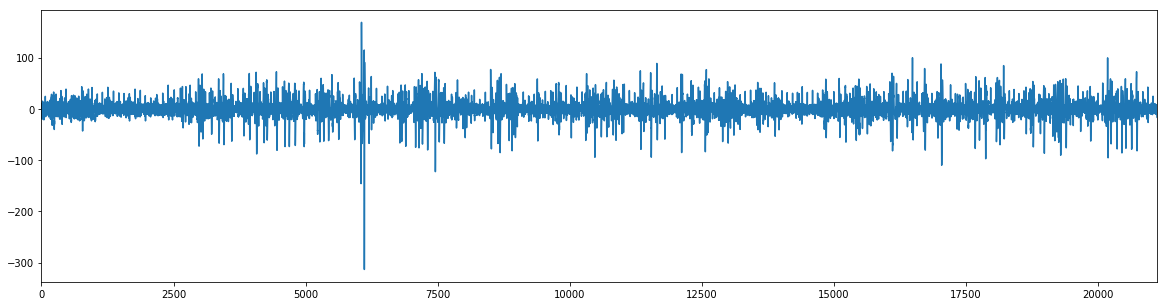

In [6]:
eeg_data1.plot(figsize=(20,5)) ## CSV file data

#### Testing for Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
#checking data is stationary or not
adf_check(eeg_data1)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -53.56307655286031
p-value : 0.0
#Lags Used : 45
Number of Observations Used : 21075
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [10]:
from statsmodels.graphics.tsaplots import plot_acf

### Auto correlation

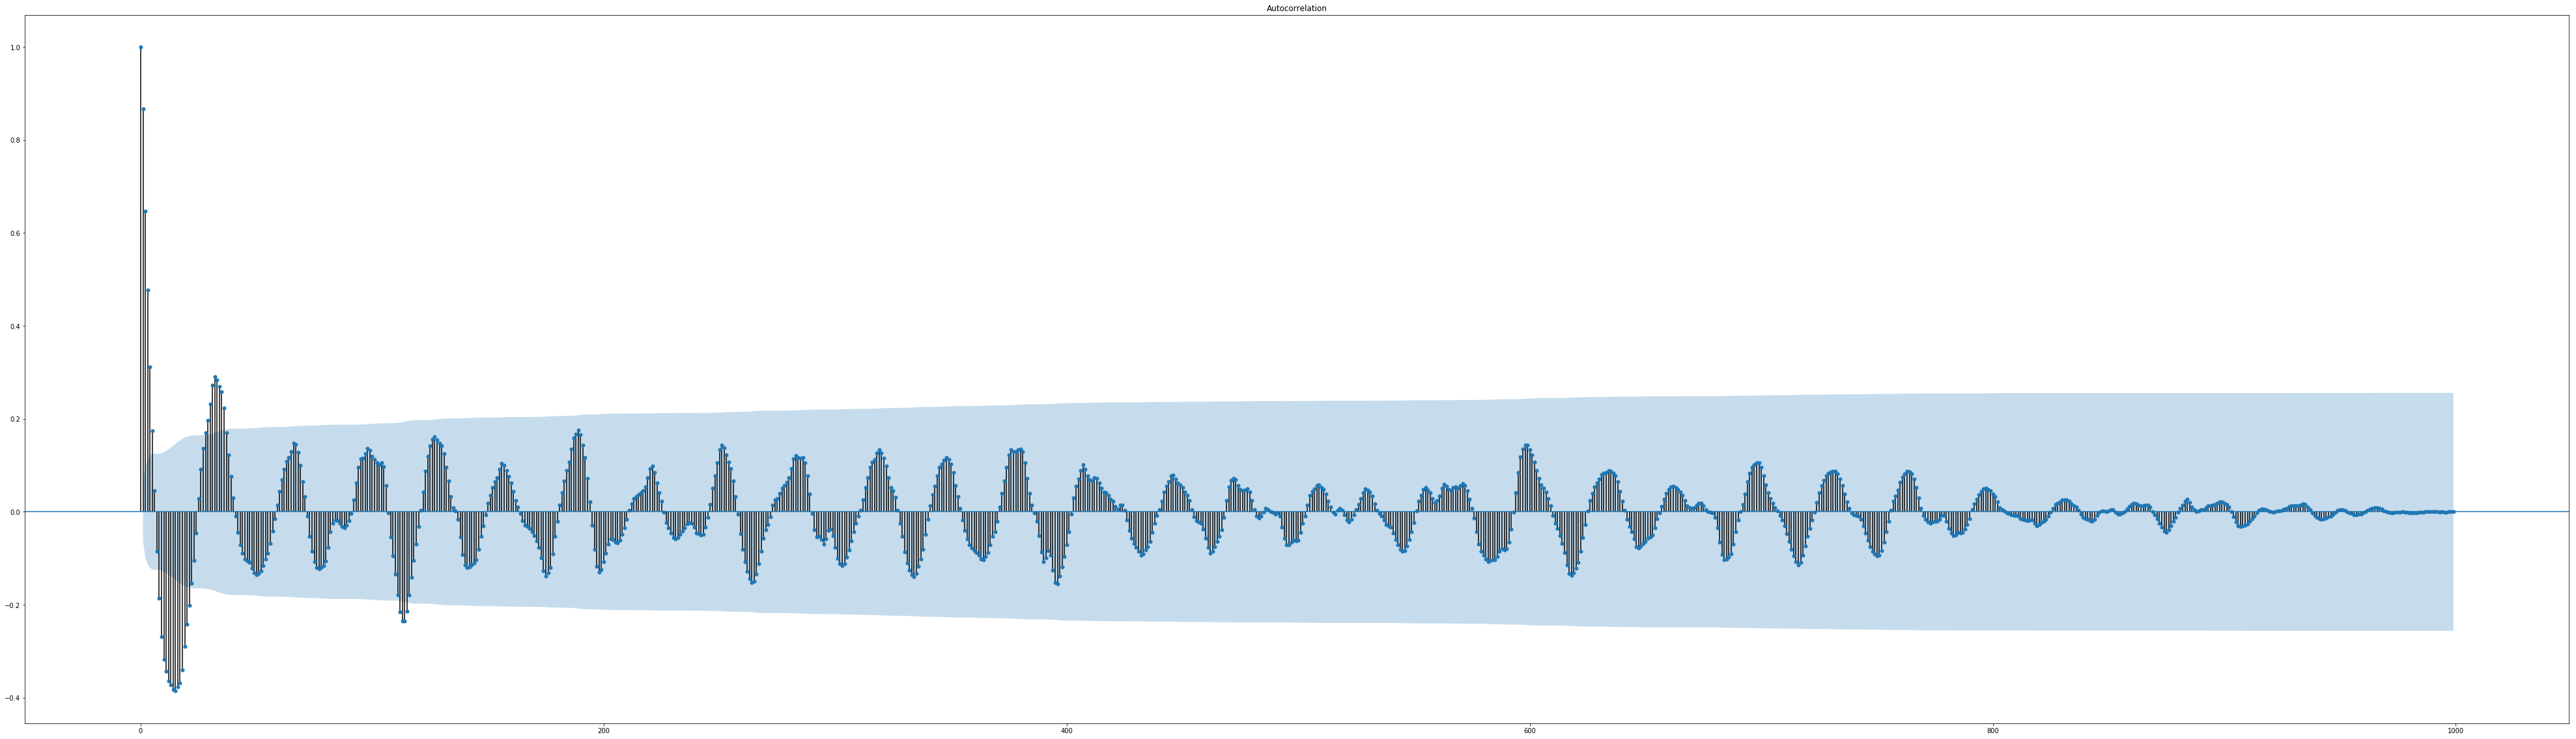

In [13]:
fig, ax = plt.subplots(figsize=(70, 20))
plot_acf(eeg_data1[:1000], ax=ax);

# Lag of time series for 15

In [31]:
#take difference 1
diff = eeg_data1.diff(periods=15)
# integrated of order 1 because here we are taking 1 lag/1 time difference
# it's denoted by d(diff), one of the parameter of ARIMA model

diff.dropna(inplace=True)
diff


15      -17.028660
16       -6.881058
17       -3.051727
18        1.866591
19        6.197038
20       -0.747328
21       -2.133783
22        7.006417
23        1.215286
24       -2.467053
25        8.530722
26        9.748431
27       12.370028
28       23.107385
29       24.812259
30       22.517782
31       17.926822
32       10.888817
33        5.810651
34       -0.354059
35       -4.066176
36       -8.493039
37      -11.832375
38       -3.498853
39        4.064184
40        8.509311
41       13.903322
42        4.360313
43       -9.292677
44      -13.894214
           ...    
21091     2.935294
21092    -2.859549
21093    -5.907962
21094    13.235937
21095    18.132807
21096     8.847638
21097    13.138315
21098    16.423354
21099    12.574233
21100     6.239257
21101     2.676724
21102    13.050322
21103    15.356684
21104     6.967958
21105     4.982921
21106    -3.143751
21107    -0.939352
21108     5.050625
21109   -14.779241
21110   -19.193903
21111    -9.773504
21112   -15.

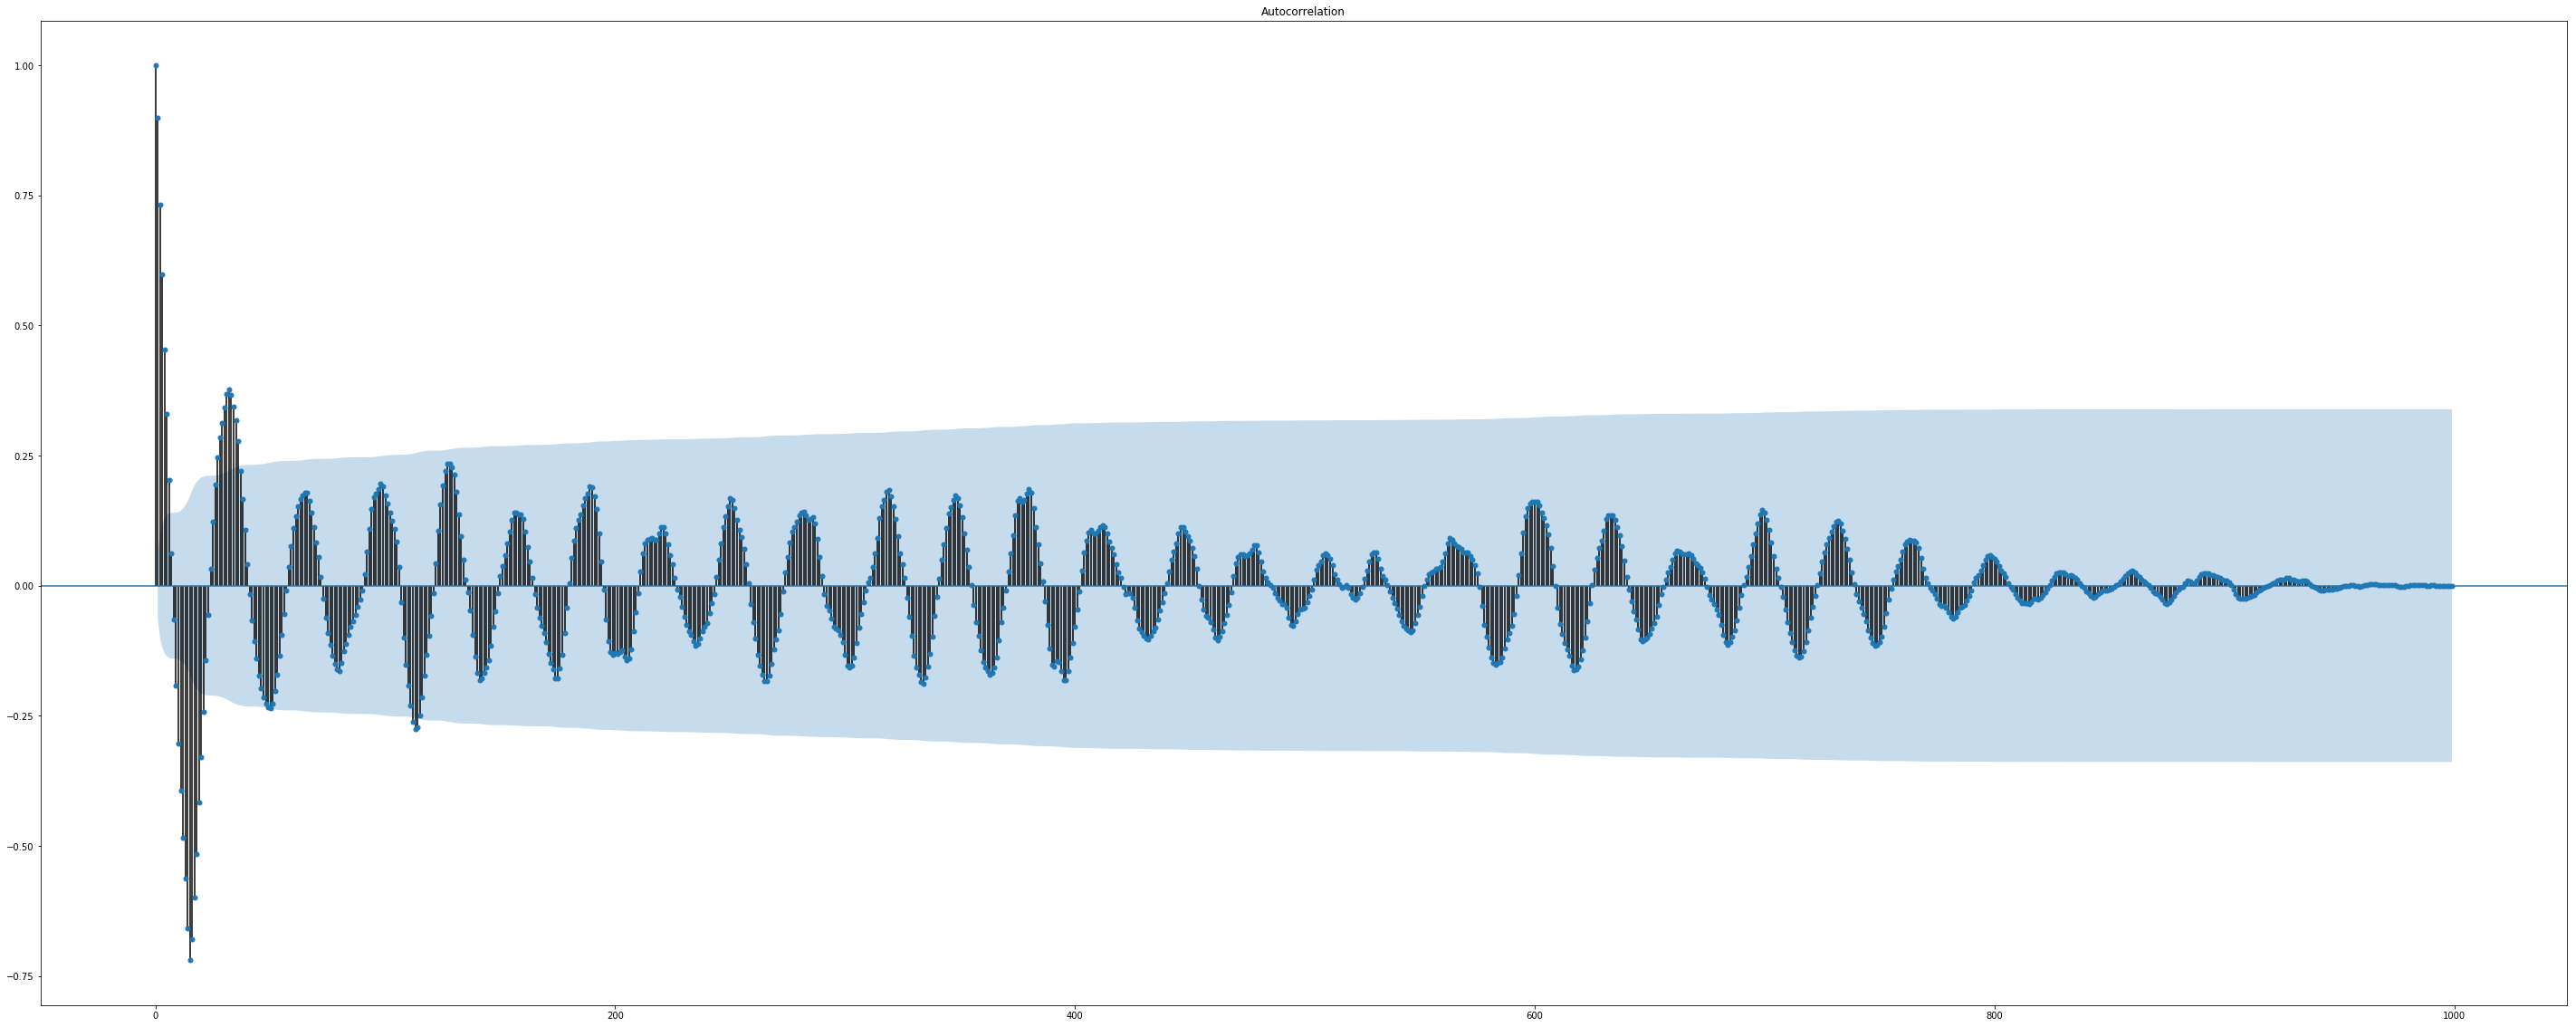

In [15]:
fig, ax = plt.subplots(figsize=(50, 20))
plot_acf(diff[:1000], ax=ax);

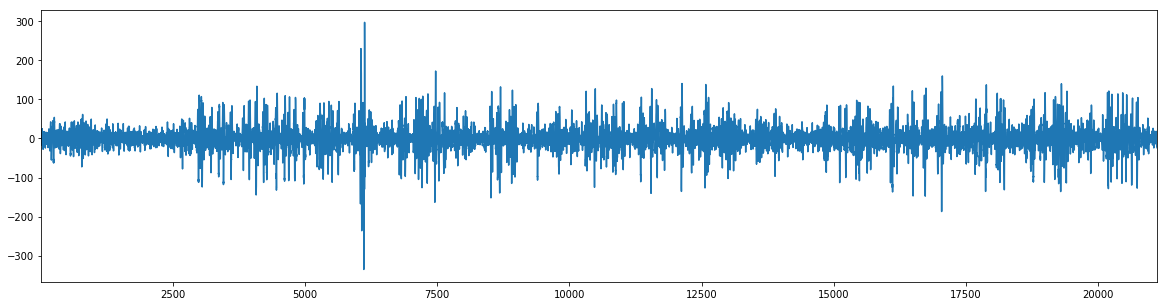

In [17]:
diff.plot(figsize=(20,5))

# Lags of time series from 16 to 20

In [29]:
df = pd.DataFrame(eeg_data1.copy())
df.columns = ["y"]

# Adding the lag of the target variable from 16 steps back up to 20
for i in range(16, 21):
    df["lag_{}".format(i)] = df.y.shift(i)

In [30]:
df.dropna()

,y,lag_16,lag_17,lag_18,lag_19,lag_20
20,5.011226e+00,-1.554068,-0.171412,0.302556,-4.509159,1.918465e-12
21,8.939256e+00,5.758554,-1.554068,-0.171412,0.302556,-4.509159e+00
22,1.522495e+01,11.073039,5.758554,-1.554068,-0.171412,3.025560e-01
23,7.298731e+00,8.218533,11.073039,5.758554,-1.554068,-1.714121e-01
24,-6.737640e-01,6.083445,8.218533,11.073039,5.758554,-1.554068e+00
25,-1.784251e+00,1.793289,6.083445,8.218533,11.073039,5.758554e+00
26,-2.877804e+00,-10.314973,1.793289,6.083445,8.218533,1.107304e+01
27,2.826127e+00,-12.626235,-10.314973,1.793289,6.083445,8.218533e+00
28,6.431618e+00,-9.543901,-12.626235,-10.314973,1.793289,6.083445e+00
29,4.922735e+00,-16.675767,-9.543901,-12.626235,-10.314973,1.793289e+00
